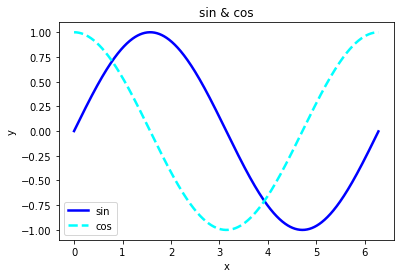

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(0,2*math.pi,0.01)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, color = 'blue', label = 'sin', linewidth = 2.5)
plt.plot(x, y2, color = 'cyan', linestyle = '--', label = 'cos', linewidth = 2.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin & cos')
plt.legend()
plt.show()

# 퍼셉트론 : 다수의 입력 ㅡ> 하나의 출력, 직선을 긋는 것
### XOR = 다층 퍼셉트론
### 나머지 = 단층 퍼셉트론

In [10]:
class gate:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
    def AND(self):
        b = - 0.7  # 편향
        if b + self.x1 * 0.5 + self.x2 * 0.5 <= 0:
            return 0
        else:
            return 1
            
    def NAND(self):
        b = 0.7
        if b + self.x1 * -0.5 + self.x2 * -0.5 <= 0 :
            return 0
        else:
            return 1
            
    def OR(self):
        b = - 0.2
        if b + self.x1 * 0.5 + self.x2 * 0.5 <= 0:
            return 0
        else:
            return 1
        
    def XOR(self):
        s1 = gate(self.x1, self.x2).NAND()
        s2 = gate(self.x1, self.x2).OR()
        y = gate(s1, s2).AND()
        return y

In [12]:
g = gate(int(input()), int(input()))
print('AND :',g.AND())
print('NAND :',g.NAND())
print('OR',g.OR())
print('XOR',g.XOR())

1
0
AND : 0
NAND : 1
OR 1
XOR 1


# 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수
## 계단 함수

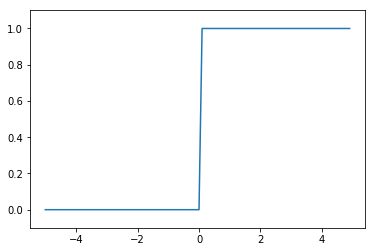

In [13]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수 : 0=0.5를 기준으로 0~1 사이의 값으로 바꿔줌

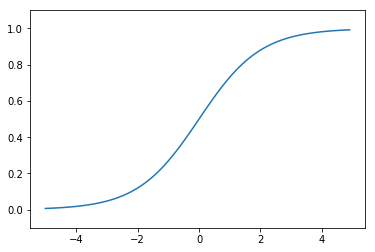

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## ReLU 함수

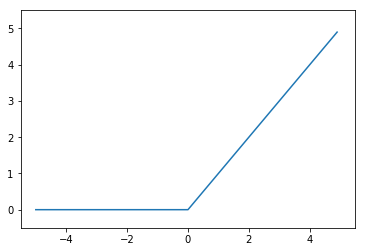

In [15]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.axis([-5.5, 5.5, -0.5, 5.5])
plt.show()

# 3층 신경망

In [16]:
def identity_function(x): # 항등 함수
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forword(network ,x)
print(y)

[0.31682708 0.69627909]


# 기계학습은 분류와 회귀로 구분
## 분류 = 데이터가 어느 클래스에 속하느냐는 문제 (소프트맥스 함수)
## 회귀 = 데이터에서 수치를 예측하는 문제 (항등 함수)

# 소프트맥스 함수 : 입력의 지수함수 / 모든 입력의 지수함수의 합
## 값은 0부터 1사이, 총합을 1로 바꿔주는 함수!
### 그러나 대소 관계가 변하지 않으므로 생략하는 것이 일반적

In [17]:
def softmax(a):
    c = np.max(a) # 오버플로우를 막기 위한 방법
    exp_a = np.exp(a - c)
    return np.exp(a - c) / np.sum(exp_a)

In [18]:
softmax(np.array([1,2,3]))

array([0.09003057, 0.24472847, 0.66524096])

# 기계학습의 문제 풀이는 학습과 추론(테스트)
## 학습에서는 소프트맥스 함수 사용, 추론에서는 생략
# 추론 과정 = 신경망의 순전파

In [19]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('/Users/My/Dropbox/Mine/Deep-Learning/ch03/sample_weight.pkl','rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [20]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 배치 처리가 더 빠르다

In [29]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 평균 제곱 오차 : 정답과 예측의 오차를 각각 제곱하여 합한 값

In [14]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [15]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


## 교차 엔트로피 오차 : 정답의 예측 값만 -log로 계산 (예측 값 < 1 이므로 클수록 오차 작아짐)

In [71]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [46]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


## 미니배치 학습

In [47]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=True)

In [58]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 배치 교차 엔트로피 오차 (원-핫 인코딩)

In [63]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

## 배치 교차 엔트로피 오차 (숫자 레이블)

In [64]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 수치 미분

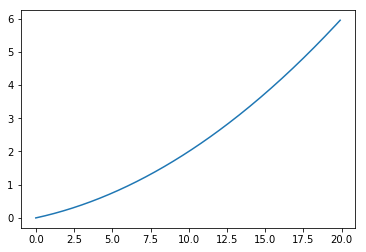

In [73]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h) 

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.show()

In [74]:
numerical_diff(function_1, 5)

0.1999999999990898

## 편미분

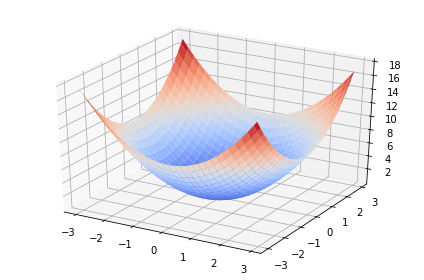

In [120]:
from mpl_toolkits.mplot3d import Axes3D

def function_2(x0, x1):
    return x0**2 + x1**2

fig = plt.figure()
ax = fig.gca(projection='3d')

x0,x1 = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))
y = function_2(x0,x1)
surf = ax.plot_surface(x0,x1,y,cmap='coolwarm')
fig.tight_layout()
plt.show()

In [108]:
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [109]:
def function_tmp2(x1):
    return 3.0**2 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 기울기

In [121]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

def function_2(x):
    return x[0]**2 + x[1]**2

In [123]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


## 경사 하강법 : 미분을 통해 기울기가 0인 지점을 찾아가기

In [124]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [135]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr= 0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

## 신경망에서 기울기

In [73]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self): # 랜덤값 생성
        self.W = np.random.randn(2,3)
        
    def predict(self, x): # 행렬곱
        return np.dot(x, self.W)
    
    def loss(self, x, t): # predict를 softmax한 다음 교차 엔트로피 계산
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [74]:
net = simpleNet()
print(net.W)

[[ 0.0207234  -0.41363951  1.4223282 ]
 [-0.53861372 -0.15924475 -1.06781712]]


In [81]:
x = np.array([0.6, 0.9])
p = softmax(net.predict(x))
print(p)

print(net.loss(x,np.array([1,0,0])))
print(net.loss(x,np.array([0,1,0])))
print(net.loss(x,np.array([0,0,1])))
t = np.array([0,0,1])

[0.28377492 0.30762322 0.40860185]
1.259573523475783
1.1788792268431212
0.8950138132255916


In [84]:
f = lambda w : net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.17026491  0.18457389 -0.3548388 ]
 [ 0.25539737  0.27686083 -0.5322582 ]]


# 2층 신경망 클래스 구현하기

In [53]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [54]:
net = TwoLayerNet(784, 100, 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [55]:
x = np.random.rand(20, 784)
y = net.predict(x)

In [5]:
t = np.random.rand(20, 10)

grads = net.numerical_gradient(x, t)

# 전체의 기울기 구하기 (약 2분 걸림)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


## 미니배치 학습

In [56]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

# 하이퍼파라미터
iters_num = 1 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 10 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(784, 20, 10)
train_loss_list = []

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

# 하이퍼파라미터
iters_num = 20000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(784, 20, 10)
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_train, t_train)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    print(round((i+1)/iters_num * 100, 2),'%')

epoch = [i for i in range(1, len(train_acc_list)+1)]
plt.hold
plt.plot(epoch, train_acc_list, 'r-')
plt.plot(epoch, test_acc_list, 'b--')

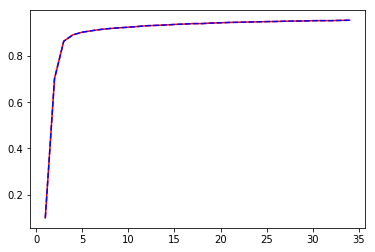

In [3]:
plt.hold
plt.plot(epoch, train_acc_list, 'r-')
plt.plot(epoch, test_acc_list, 'b--')

# 오차역전파법

## 곱셈 계층

In [35]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [11]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        
        return x * y
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

In [12]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

220.00000000000003
2.2 110.00000000000001 200


## 덧셈 계층

In [5]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        return x + y
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

## 곱셈 + 덧셈

In [6]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange_num, dorange, dtax)

715.0000000000001
110.00000000000001 2.2 165.0 3.3000000000000003 650


# ReLU 계층

In [13]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

# Sigmoid 계층

In [25]:
class sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1 - self.out) * self.out
        
        return dx

# Affine 계층

In [32]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

# Softmax-with-Loss 계층

In [33]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self. t = None
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

# 오차역전파법 기반 신경망 !!

# 2층 신경망

In [1]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

0.01 %
6.01 %
12.01 %
18.01 %
24.01 %
30.01 %
36.01 %
42.01 %
48.01 %
54.01 %
60.01 %
66.01 %
72.01 %
78.01 %
84.01 %
90.01 %
96.01 %
train_acc = 0.9465166666666667
test_acc = 0.9456


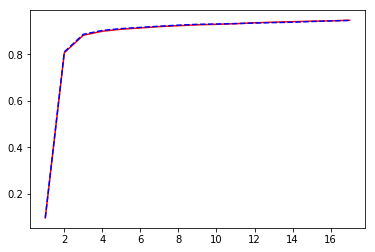

In [46]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = TwoLayerNet(784, 90, 10)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(round((i+1)/iters_num * 100, 2),'%')

epoch = [i for i in range(1, len(train_acc_list)+1)]
plt.hold
plt.plot(epoch, train_acc_list, 'r-')
plt.plot(epoch, test_acc_list, 'b--')
print('train_acc =', train_acc)
print('test_acc =', test_acc)

# 3층 신경망

In [1]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class ThreeLayerNet:
    def __init__(self, input_size, first_size, second_size, output_size, weight_init_std = 0.01):
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, first_size)
        self.params['b1'] = np.zeros(first_size)
        self.params['W2'] = weight_init_std * np.random.randn(first_size, second_size)
        self.params['b2'] = np.zeros(second_size)
        self.params['W3'] = weight_init_std * np.random.randn(second_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid'] = Sigmoid()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads

0.01 %
3.0 %
6.0 %
9.01 %
12.01 %
15.0 %
18.0 %
21.0 %
24.01 %
27.01 %
30.0 %
33.01 %
36.0 %
39.01 %
42.0 %
45.01 %
48.0 %
51.01 %
54.01 %
57.0 %
60.0 %
63.01 %
66.0 %
69.01 %
72.0 %
75.0 %
78.0 %
81.01 %
84.0 %
87.0 %
90.0 %
93.01 %
96.0 %
99.0 %
train_acc = 0.99075
test_acc = 0.9763


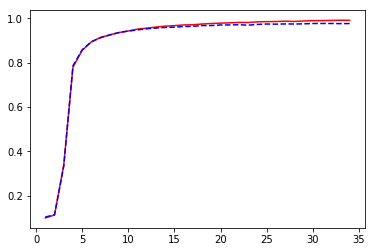

In [3]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = ThreeLayerNet(784, 200, 50, 10)

# 하이퍼파라미터
iters_num = 20000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(round((i+1)/iters_num * 100, 2),'%')

epoch = [i for i in range(1, len(train_acc_list)+1)]
plt.plot(epoch, train_acc_list, 'r-')
plt.plot(epoch, test_acc_list, 'b--')
print('train_acc =', train_acc)
print('test_acc =', test_acc)
plt.show()

# 4층 신경망

In [70]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.layers import *
from collections import OrderedDict

class FourLayerNet:
    def __init__(self, input_size, first_size, second_size, third_size, output_size, weight_init_std = 0.01):
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, first_size)
        self.params['b1'] = np.zeros(first_size)
        self.params['W2'] = weight_init_std * np.random.randn(first_size, second_size)
        self.params['b2'] = np.zeros(second_size)
        self.params['W3'] = weight_init_std * np.random.randn(second_size, third_size)
        self.params['b3'] = np.zeros(third_size)
        self.params['W4'] = weight_init_std * np.random.randn(third_size, output_size)
        self.params['b4'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu3'] = Relu()
        self.layers['Affine4'] = Affine(self.params['W4'], self.params['b4'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        grads['W4'], grads['b4'] = self.layers['Affine4'].dW, self.layers['Affine4'].db

        return grads

0.0 %
2.0 %
4.0 %
6.0 %
8.0 %
10.0 %
12.0 %
14.0 %
16.0 %
18.0 %
20.0 %
22.0 %
24.0 %
26.0 %
28.0 %
30.0 %
32.0 %
34.0 %
36.0 %
38.0 %
40.0 %
42.0 %
44.0 %
46.0 %
48.0 %
50.0 %
52.0 %
54.0 %
56.0 %
58.0 %
60.0 %
62.0 %
64.0 %
66.0 %
68.0 %
70.0 %
72.0 %
74.0 %
76.0 %
78.0 %
80.0 %
82.0 %
84.0 %
86.0 %
88.0 %
90.0 %
92.0 %
94.0 %
96.0 %
98.0 %
train_acc = 1.0
test_acc = 0.9774


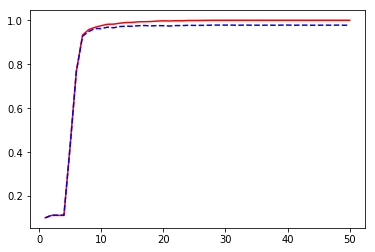

In [65]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = FourLayerNet(784, 300, 100, 30, 10)

# 하이퍼파라미터
iters_num = 30000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(round((i+1)/iters_num * 100, 2),'%')

epoch = [i for i in range(1, len(train_acc_list)+1)]
plt.plot(epoch, train_acc_list, 'r-')
plt.plot(epoch, test_acc_list, 'b--')
print('train_acc =', train_acc)
print('test_acc =', test_acc)
plt.show()

# My 숫자

In [66]:
import matplotlib.image as mpimg

test = []
ans = np.diag([1]*10)
for i in range(10):
    img = mpimg.imread('{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(784,)
    test.append(img)
    
test = np.array(test)
network.accuracy(test,ans)

1.0

In [67]:
import matplotlib.image as mpimg

for i in range(10):
    img = mpimg.imread('{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(1,784)

    v = network.predict(img)
    print(v)
    print('정답 =',[i],',', '예측 =',np.where(v[0]==max(max(v)))[0], '차이 =', abs(v[0][i]-max(max(v))))
    print(' ')

[[ 19.96549035 -13.83059273   6.10888374   1.86850383 -16.60370444
   11.35420021  11.21498407 -18.89009382   7.11146819  -8.00856703]]
정답 = [0] , 예측 = [0] 차이 = 0.0
 
[[-12.91040954  24.3959591   13.93600322  -8.65423113   8.52967763
  -25.07843306  -4.65740805  13.11066826   0.97719818  -9.69119564]]
정답 = [1] , 예측 = [1] 차이 = 0.0
 
[[ -4.60401008   9.80300876  16.43356535  -1.58757673  -1.95903171
  -15.96691778  -4.42955159   4.06690615   8.20266926  -9.68633354]]
정답 = [2] , 예측 = [2] 차이 = 0.0
 
[[ -2.33209263 -25.10868252   0.52548194  35.29995991 -25.28688332
   12.9607208  -33.04868556   8.06846282  14.99068493  14.93078709]]
정답 = [3] , 예측 = [3] 차이 = 0.0
 
[[-25.46184756   7.12280074  -1.6183199   -4.8606383   17.44202836
  -11.77384288 -10.22748072  10.33853764   7.96248506  11.14638011]]
정답 = [4] , 예측 = [4] 차이 = 0.0
 
[[  6.61546937 -43.56403592 -13.79963987  23.23971073 -19.46797546
   33.63660766 -10.36009044 -17.10165912  19.09033148  22.48772867]]
정답 = [5] , 예측 = [5] 차이 = 0.0


# 재민's 숫자

In [68]:
import matplotlib.image as mpimg

test = []
ans = np.diag([1]*10)
for i in range(10):
    img = mpimg.imread('S{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(784,)
    test.append(img)
    
test = np.array(test)
network.accuracy(test,ans)

0.8

In [69]:
import matplotlib.image as mpimg

for i in range(10):
    img = mpimg.imread('S{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(1,784)

    v = network.predict(img)
    print(v)
    print('정답 =',[i],',', '예측 =',np.where(v[0]==max(max(v)))[0], '차이 =', abs(v[0][i]-max(max(v))))
    print(' ')

[[-11.71361054 -12.92493908  -8.82774756  10.2073866    0.08694462
    8.13821288 -13.74536323   2.56334725   9.37034657  17.18944918]]
정답 = [0] , 예측 = [9] 차이 = 28.903059719994005
 
[[-13.84331721   2.895987     4.50702358 -14.40579556  14.55431711
   -9.41679654   6.3532502   -6.516216    14.16294264   1.77135232]]
정답 = [1] , 예측 = [4] 차이 = 11.658330106075944
 
[[ -9.89509817  11.96555771  28.23643782  -1.61994726  -0.99904703
  -26.00223863  -8.31373943   6.44551229  15.46742919 -14.76815562]]
정답 = [2] , 예측 = [2] 차이 = 0.0
 
[[ -2.72166789 -43.14273373  -1.39050989  64.49685507 -45.46811419
   23.84293921 -60.30772953  17.64781831  21.98531143  26.77299214]]
정답 = [3] , 예측 = [3] 차이 = 0.0
 
[[-56.67745935  14.56747955  -8.7764662  -13.4115631   43.53115475
  -23.41485372 -19.50210992  22.42166951  14.1317002   27.08566672]]
정답 = [4] , 예측 = [4] 차이 = 0.0
 
[[ 12.58403769 -50.51841806 -13.68405032  24.94593414 -24.55388491
   39.3028126   -7.41086307 -23.53016823  21.84037897  21.8919013 ]]